11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7741 - loss: 0.7056 - val_accuracy: 0.9582 - val_loss: 0.1353
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9541 - loss: 0.1629 - val_accuracy: 0.9677 - val_loss: 0.1079
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9687 - loss: 0.1086 - val_accuracy: 0.9699 - val_loss: 0.1011
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9746 - loss: 0.0846 - val_accuracy: 0.9732 - val_loss: 0.0928
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9788 - loss: 0.0733 - val_accuracy: 0.9737 - val_loss: 0.0917
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9828 - loss: 0.0578 - val_accuracy: 0.9771 - val_loss: 0.0898
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9829 - loss: 0.0568 - val_accuracy: 0.9758 - val_loss: 0.0897
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9850 - loss: 0.0470 - val

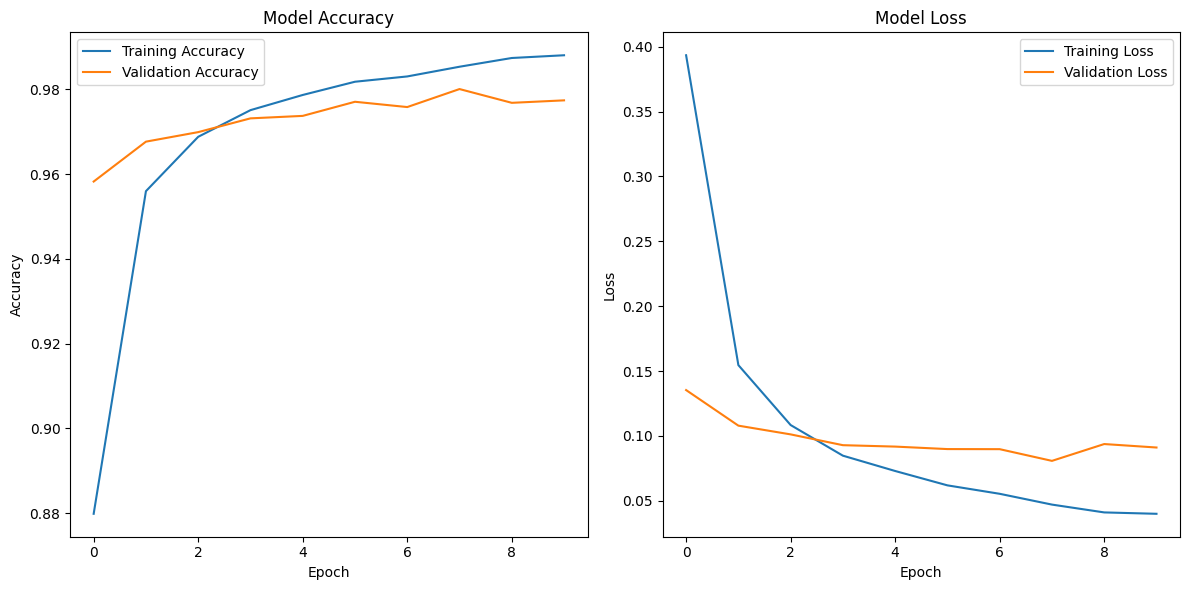

In [ ]:
#4. Build a multi-layer neural network to improve the test accuracy using drop out layers.

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images (28x28 to 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Build the neural network with dropout layers
model = Sequential([
Dense(512, activation='relu', input_shape=(28 * 28,)), # First hidden layer
Dropout(0.2), # Dropout with 20% probability
Dense(256, activation='relu'), # Second hidden layer
Dropout(0.3), # Dropout with 30% probability
Dense(128, activation='relu'), # Third hidden layer
Dropout(0.4), # Dropout with 40% probability
Dense(10, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")




# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()